In [923]:
import pandas as pd
import numpy as np
import seaborn as sns 


### overview of train

In [924]:
train=pd.read_csv("train.csv")

In [925]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
0,TCBA-B8-0x204,7,Male,60-64,NaN,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [926]:
train.shape

(2952, 70)

In [927]:
train.describe(include='all')

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer
count,2952,2952.000000,2952,2927,2649,2952.000000,2952.000000,2550.000000,2952.000000,2952.000000,...,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000,2952.000000
unique,2952,NaN,2,12,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TCBA-B8-0x1be,NaN,Male,75-79,White,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1668,451,2256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.036924,NaN,NaN,NaN,2010.925136,80940.815718,2016.694118,14.992209,5.195799,...,0.026762,0.026423,0.026084,0.023713,0.019986,0.020325,0.019648,0.019986,0.024729,0.699526
std,NaN,24.840630,NaN,NaN,NaN,1.402237,1357.411378,1.745409,7.926741,2.459212,...,0.161413,0.160416,0.159412,0.152178,0.139977,0.141134,0.138810,0.139977,0.155324,0.458542
min,NaN,1.000000,NaN,NaN,NaN,2009.000000,80003.000000,2013.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,2010.000000,80103.000000,2015.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,NaN,NaN,2011.000000,80463.000000,2017.000000,15.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,3.000000,NaN,NaN,NaN,2012.000000,81403.000000,2018.000000,20.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [928]:
columns=train.columns

In [929]:
for clm in columns:
    print("\n "+clm+" : ",train[clm].describe())

#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 


 patient_id :  count              2952
unique             2952
top       TCBA-B8-0x1be
freq                  1
Name: patient_id, dtype: object

 tumor_cell_count :  count    2952.000000
mean        8.036924
std        24.840630
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       323.000000
Name: tumor_cell_count, dtype: float64

 gender :  count     2952
unique       2
top       Male
freq      1668
Name: gender, dtype: object

 age_group :  count      2927
unique       12
top       75-79
freq        451
Name: age_group, dtype: object

 race :  count      2649
unique        6
top       White
freq       2256
Name: race, dtype: object

 year_of_diagnosis :  count    2952.000000
mean     2010.925136
std         1.402237
min      2009.000000
25%      2010.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: year_of_diagnosis, dtype: float64

 morphology_code :  count     2952.000000
mean     80940.815718
std       1357.411378

Name: symptom64, dtype: float64

 symptom65 :  count    2952.000000
mean        0.019986
std         0.139977
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: symptom65, dtype: float64

 symptom66 :  count    2952.000000
mean        0.024729
std         0.155324
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: symptom66, dtype: float64

 death_due_to_cancer :  count    2952.000000
mean        0.699526
std         0.458542
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: death_due_to_cancer, dtype: float64


In [1]:
for clm in columns:
    print("null values in "+clm+" : ",train[clm].isnull().sum())

#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 

NameError: name 'columns' is not defined

In [931]:
train["death_due_to_cancer" ].unique()

array([1, 0], dtype=int64)

### overview of test

In [932]:
#for test data
test=pd.read_csv("test.csv")
test.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
0,TCBA-B8-0x7e9,1,Male,85-89,White,2009,80003,2014.0,25,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCBA-B8-0x6bc,1,Male,80-84,White,2013,82503,2020.0,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCBA-B8-0x1195,1,Male,60-64,White,2013,80703,2017.0,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCBA-B8-0x8a5,1,Male,85-89,White,2013,80103,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCBA-B8-0xa21,1,Male,85-89,White,2009,80003,NaN,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [933]:
test.describe(include='all')

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom57,symptom58,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66
count,1969,1969.000000,1969,1954,1770,1969.000000,1969.000000,1687.000000,1969.000000,1969.000000,...,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
unique,1969,NaN,2,12,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TCBA-B8-0x1335,NaN,Male,75-79,White,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1107,340,1519,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.644997,NaN,NaN,NaN,2010.853225,80883.195023,2016.598103,14.791772,5.326562,...,0.021341,0.017785,0.021341,0.021850,0.025407,0.024898,0.024390,0.028455,0.027947,0.020833
std,NaN,23.119727,NaN,NaN,NaN,1.394054,1294.474641,1.773924,7.931638,2.456638,...,0.144557,0.132201,0.144557,0.146229,0.157396,0.155855,0.154297,0.166312,0.164863,0.142862
min,NaN,1.000000,NaN,NaN,NaN,2009.000000,80003.000000,2013.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,2010.000000,80103.000000,2015.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1.000000,NaN,NaN,NaN,2011.000000,80463.000000,2017.000000,15.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,3.000000,NaN,NaN,NaN,2012.000000,81403.000000,2018.000000,20.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [934]:
columns=test.columns
for clm in columns:
    print("null values in "+clm+" : ",test[clm].isnull().sum())
#only year of death has missing values

null values in patient_id :  0
null values in tumor_cell_count :  0
null values in gender :  0
null values in age_group :  15
null values in race :  199
null values in year_of_diagnosis :  0
null values in morphology_code :  0
null values in year_of_death :  282
null values in smoke_units :  0
null values in area_code :  0
null values in alcohol_consume_units :  0
null values in symptoms :  0
null values in symptom1 :  1
null values in symptom2 :  1
null values in symptom3 :  1
null values in symptom4 :  1
null values in symptom5 :  1
null values in symptom6 :  1
null values in symptom7 :  1
null values in symptom8 :  1
null values in symptom9 :  1
null values in symptom10 :  1
null values in symptom11 :  1
null values in symptom12 :  1
null values in symptom13 :  1
null values in symptom14 :  1
null values in symptom15 :  1
null values in symptom16 :  1
null values in symptom17 :  1
null values in symptom18 :  1
null values in symptom19 :  1
null values in symptom20 :  1
null values i

### Handle missing values 

In [935]:
#we have three columns with missing values age_group ,race ,year_of_death  lets first handle missing values 
#we only have 25 missing values and most of the age groups are from 75-79 with frequency of 451/2952 we can fill it by most frequent
train["age_group"].describe()

count      2927
unique       12
top       75-79
freq        451
Name: age_group, dtype: object

In [936]:
train["age_group"][0]

'60-64'

In [937]:
train["age_group"].fillna('75-79',inplace=True)
print("null values in age group column :",train["age_group"].isnull().sum())

null values in age group column : 0


In [938]:
test["age_group"].fillna('75-79',inplace=True)


In [939]:
#missing values for race column
#most of the race are white with frequency of 2256/2952 we can fill it by most frequent

train["race"].describe()
train["race"].fillna('White',inplace=True)
print("null values in race column :",train["race"].isnull().sum())

null values in race column : 0


In [940]:
##for test
test["race"].fillna('White',inplace=True)

In [941]:
#missing values for race column year_of_death
train["year_of_death"].describe()

count    2550.000000
mean     2016.694118
std         1.745409
min      2013.000000
25%      2015.000000
50%      2017.000000
75%      2018.000000
max      2020.000000
Name: year_of_death, dtype: float64

<AxesSubplot:xlabel='year_of_death', ylabel='count'>

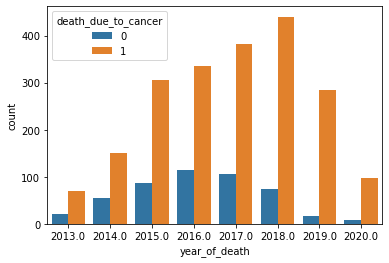

In [942]:
sns.countplot(x='year_of_death',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='year_of_death', ylabel='count'>

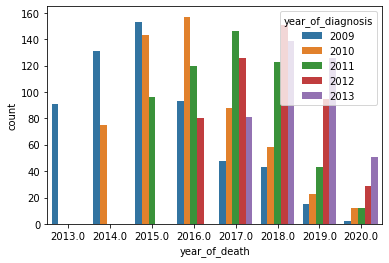

In [943]:
sns.countplot(x='year_of_death',data=train,hue="year_of_diagnosis")

In [944]:
#here i am creting a new feature which is duration of diagnosis 
#duration_of_diagnosis=year_of_death-year_of_diagnosis 
#for missing values in year of death we first fill it by null then we use mean to fill them

train["duration_of_diagnosis"]=train["year_of_death"]-train["year_of_diagnosis"]

In [945]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,year_of_diagnosis,morphology_code,year_of_death,smoke_units,area_code,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,2010,81403,2016.0,34,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,2012,80463,2016.0,4,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
2,TCBA-B8-0xb7d,1,Female,70-74,White,2013,80103,2018.0,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,TCBA-B8-0xfa7,104,Female,65-69,White,2013,80463,2018.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
4,TCBA-B8-0xdc,21,Male,50-54,White,2010,80463,2016.0,20,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0


In [946]:
train["duration_of_diagnosis"].describe

<bound method NDFrame.describe of 0       6.0
1       4.0
2       5.0
3       5.0
4       6.0
       ... 
2947    6.0
2948    NaN
2949    5.0
2950    7.0
2951    5.0
Name: duration_of_diagnosis, Length: 2952, dtype: float64>

In [947]:
train["duration_of_diagnosis"].isnull().sum()

402

In [948]:
#drop year_of_death,year_of_diagnosis 
train.drop(["year_of_death","year_of_diagnosis"],inplace=True,axis=1)


In [949]:
train.head()

,patient_id,tumor_cell_count,gender,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,81403,34,2,2,Dry eye,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,80463,4,7,5,Calm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0
2,TCBA-B8-0xb7d,1,Female,70-74,White,80103,20,1,4,Allergies,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,TCBA-B8-0xfa7,104,Female,65-69,White,80463,20,5,3,Gabapentin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
4,TCBA-B8-0xdc,21,Male,50-54,White,80463,20,5,2,Obsessive-compulsive disorder,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0


In [958]:
train["duration_of_diagnosis"].describe()

count    2952.000000
mean        5.610095
std         1.408718
min         4.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        11.000000
Name: duration_of_diagnosis, dtype: float64

In [959]:
train["duration_of_diagnosis"].unique()

array([ 6.,  4.,  5.,  7.,  8., 10.,  9., 11.])

<AxesSubplot:xlabel='duration_of_diagnosis', ylabel='count'>

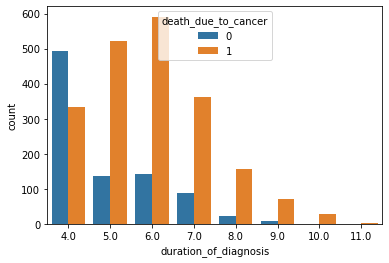

In [960]:
sns.countplot(x='duration_of_diagnosis',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='race', ylabel='count'>

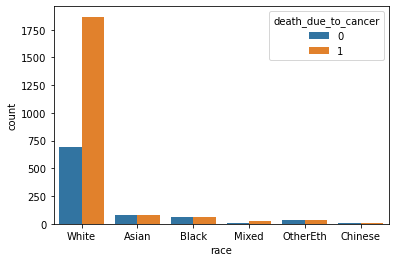

In [961]:
sns.countplot(x='race',data=train,hue="death_due_to_cancer")

<AxesSubplot:xlabel='duration_of_diagnosis', ylabel='count'>

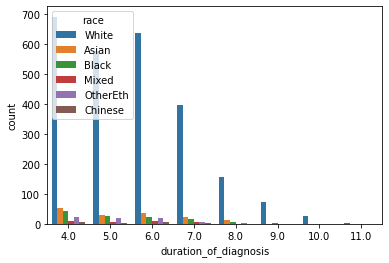

In [962]:
sns.countplot(x='duration_of_diagnosis',data=train,hue="race")

In [963]:
train["duration_of_diagnosis"].fillna(4,inplace=True)

In [964]:
#same for the test
test["duration_of_diagnosis"]=test["year_of_death"]-test["year_of_diagnosis"]
test["duration_of_diagnosis"].fillna(4,inplace=True)

In [965]:
test.shape

(1969, 70)

In [966]:
test.dropna(inplace=True)#only 1 value is missing from other feature so we simly can drop that

#### convert all feature to numerical form 

In [967]:
train.head(2)

,patient_id,tumor_cell_count,gender,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,...,symptom59,symptom60,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis
0,TCBA-B8-0x204,7,Male,60-64,White,81403,34,2,2,Dry eye,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0
1,TCBA-B8-0x1063,1,Male,85-89,White,80463,4,7,5,Calm,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0


In [968]:
train['patient_id'].unique().size
#we dont need id so drop it
train.drop("patient_id",inplace=True,axis=1)
test.drop("patient_id",inplace=True,axis=1)

In [969]:
for i in range(len(train)):
    if train["gender"] is "Male":
        train["male"]=1
        train["female"]=0
    else:
        train["male"]=0
        train["female"]=1
train.drop("gender",inplace=True,axis=1)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-969-f0805ef7b71b>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if train["gender"] is "Male":


In [970]:
for i in range(len(train)):
    if test["gender"] is "Male":
        test["male"]=1
        test["female"]=0
    else:
        test["male"]=0
        test["female"]=1
test.drop("gender",inplace=True,axis=1)

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-970-d308e2e7d4a6>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if test["gender"] is "Male":


In [971]:
train["race"].unique()

array(['White', 'Asian', 'Black', 'Mixed', 'OtherEth', 'Chinese'],
      dtype=object)

In [972]:
freq=train["race"].value_counts()


In [973]:
for i in range(len(train)):
    train["race"][i]=freq[train["race"][i]]#max normalization

<ipython-input-973-a70ceaa46946>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["race"][i]=freq[train["race"][i]]#max normalization


In [974]:
test['race'].unique()

array(['White', 'Black', 'Chinese', 'Asian', 'OtherEth', 'Mixed'],
      dtype=object)

In [975]:
freq=test["race"].value_counts()
freq#remove 1493 category from race 


White       1493
Asian         67
OtherEth      52
Black         51
Chinese       13
Mixed         10
Name: race, dtype: int64

In [976]:
test["Race"]=0
for i in range(len(test)):
    try:
        test["Race"][i]=freq[test["race"][i]]#max normalization
    except:
        print()
        test["Race"][i]=0

<ipython-input-976-24f23409504d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Race"][i]=freq[test["race"][i]]#max normalization
<ipython-input-976-24f23409504d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Race"][i]=0


In [977]:
test["Race"].unique()

array([1493,   51,   13,   67,   52,   10,    0], dtype=int64)

In [978]:
test.drop('race',inplace=True,axis=1)

In [979]:
test.rename(columns={'Race':'race'},inplace=True)

In [980]:
train.head(2)

,tumor_cell_count,age_group,race,morphology_code,smoke_units,area_code,alcohol_consume_units,symptoms,symptom1,symptom2,...,symptom61,symptom62,symptom63,symptom64,symptom65,symptom66,death_due_to_cancer,duration_of_diagnosis,male,female
0,7,60-64,2559,81403,34,2,2,Dry eye,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,6.0,0,1
1,1,85-89,2559,80463,4,7,5,Calm,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,0,1


In [981]:
#categorical-->age_group,gender,race,symptom#
#one hot encoding for age group

In [982]:
train['age_group'].unique()

array(['60-64', '85-89', '70-74', '65-69', '50-54', '75-79', '80-84',
       '55-59', '90+', '40-44', '45-49', '00-39'], dtype=object)

In [983]:
train.drop('symptoms',inplace=True,axis=1)
test.drop('symptoms',inplace=True,axis=1)

In [984]:
young=['00-39','45-49','40-44']
mid=['60-64', '70-74', '65-69', '50-54','55-59']
old=['75-79', '80-84','90+','85-89']
train['young']=0
train['mid']=0
train['old']=0
for i in range(len(train)):
    if train['age_group'][i] in young:
        train['young'][i]=1
        train['mid'][i]=0
        train['old'][i]=0
    if train['age_group'][i] in mid:
        train['young'][i]=0
        train['mid'][i]=1
        train['old'][i]=0
    if train['age_group'][i] in old:
        train['young'][i]=0
        train['mid'][i]=0
        train['old'][i]=1   
train.drop('age_group',inplace=True,axis=1)        

<ipython-input-984-f2dce77905f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['young'][i]=0
<ipython-input-984-f2dce77905f0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mid'][i]=1
<ipython-input-984-f2dce77905f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['old'][i]=0
<ipython-input-984-f2dce77905f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [985]:

young=['00-39','45-49','40-44']
mid=['60-64', '70-74', '65-69', '50-54','55-59']
old=['75-79', '80-84','90+','85-89']
test['young']=0
test['mid']=0
test['old']=0
for i in range(len(test)):
    try:
        if test['age_group'][i] in young:
            test['young'][i]=1
            test['mid'][i]=0
            test['old'][i]=0
        if test['age_group'][i] in mid:
            test['young'][i]=0
            test['mid'][i]=1
            test['old'][i]=0
        if test['age_group'][i] in old:
            test['young'][i]=0
            test['mid'][i]=0
            test['old'][i]=1   
    except:
            test['young'][i]=0
            test['mid'][i]=0
            test['old'][i]=1 
        
test.drop('age_group',inplace=True,axis=1)        

<ipython-input-985-f5f0597e8f70>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['young'][i]=0
<ipython-input-985-f5f0597e8f70>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mid'][i]=0
<ipython-input-985-f5f0597e8f70>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['old'][i]=1
<ipython-input-985-f5f0597e8f70>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [986]:
train.shape

(2952, 70)

In [987]:
test.drop('year_of_diagnosis',inplace=True,axis=1)
test.drop('year_of_death',inplace=True,axis=1)
test.shape

(1686, 69)

In [988]:
train.columns

Index(['tumor_cell_count', 'race', 'morphology_code', 'smoke_units',
       'area_code', 'alcohol_consume_units', 'symptom1', 'symptom2',
       'symptom3', 'symptom4', 'symptom5', 'symptom6', 'symptom7', 'symptom8',
       'symptom9', 'symptom10', 'symptom11', 'symptom12', 'symptom13',
       'symptom14', 'symptom15', 'symptom16', 'symptom17', 'symptom18',
       'symptom19', 'symptom20', 'symptom21', 'symptom22', 'symptom23',
       'symptom24', 'symptom25', 'symptom26', 'symptom27', 'symptom28',
       'symptom29', 'symptom30', 'symptom31', 'symptom32', 'symptom33',
       'symptom34', 'symptom35', 'symptom36', 'symptom37', 'symptom38',
       'symptom39', 'symptom40', 'symptom50', 'symptom51', 'symptom52',
       'symptom53', 'symptom54', 'symptom55', 'symptom56', 'symptom57',
       'symptom58', 'symptom59', 'symptom60', 'symptom61', 'symptom62',
       'symptom63', 'symptom64', 'symptom65', 'symptom66',
       'death_due_to_cancer', 'duration_of_diagnosis', 'male', 'female',
    

In [989]:
test.columns

Index(['tumor_cell_count', 'morphology_code', 'smoke_units', 'area_code',
       'alcohol_consume_units', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'symptom7', 'symptom8', 'symptom9', 'symptom10',
       'symptom11', 'symptom12', 'symptom13', 'symptom14', 'symptom15',
       'symptom16', 'symptom17', 'symptom18', 'symptom19', 'symptom20',
       'symptom21', 'symptom22', 'symptom23', 'symptom24', 'symptom25',
       'symptom26', 'symptom27', 'symptom28', 'symptom29', 'symptom30',
       'symptom31', 'symptom32', 'symptom33', 'symptom34', 'symptom35',
       'symptom36', 'symptom37', 'symptom38', 'symptom39', 'symptom40',
       'symptom50', 'symptom51', 'symptom52', 'symptom53', 'symptom54',
       'symptom55', 'symptom56', 'symptom57', 'symptom58', 'symptom59',
       'symptom60', 'symptom61', 'symptom62', 'symptom63', 'symptom64',
       'symptom65', 'symptom66', 'duration_of_diagnosis', 'male', 'female',
       'race', 'young', 'mid', 'old'],
   

### modeling

In [990]:
#split the data in x and y

x = train.drop('death_due_to_cancer', axis=1).values
y = train['death_due_to_cancer'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=50,shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=50,shuffle=True)

In [991]:
# import Library for modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import f1_score

In [992]:
# 1. KNN 

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred1 = knn.predict(x_valid)

print(f"KNeighborsClassifier F1 Score: {f1_score(y_valid, y_pred1, average='micro')}")

KNeighborsClassifier F1 Score: 0.688135593220339


In [993]:
# 2. Support Vector Machine

svc = SVC(probability=True)

svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_valid)

print(f"Support Vector Machine F1 Score: {f1_score(y_valid, y_pred2, average='micro')}")

Support Vector Machine F1 Score: 0.688135593220339


In [994]:
# 3. LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred3 = lr.predict(x_valid)

print(f"Logistic Regression F1 Score: {f1_score(y_valid, y_pred3, average='micro')}")

Logistic Regression F1 Score: 0.7101694915254236


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [995]:
# 4. Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred4 = rf.predict(x_valid)

print(f"RandomForest F1 Score: {f1_score(y_valid, y_pred4, average='micro')}")

RandomForest F1 Score: 0.7576271186440678


In [996]:
#final model
x_test=test.values
x_test.shape

(1686, 69)

In [1]:
# 4. Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred4 = rf.predict(x_valid)

print(f"RandomForest F1 Score: {f1_score(sample_submission['death_due_to_cancer'], y_pred, average='micro')}")

NameError: name 'RandomForestClassifier' is not defined